In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [23]:
from functools import reduce
def mm_ss2seconds(mm_ss):
    return reduce(lambda acc, x: acc*60 + x, map(int, mm_ss.split(':')))

In [27]:
# Load in all the results
b0 = pd.read_csv("../../results/b0.csv", index_col=['epoch'],converters={'time': mm_ss2seconds}) 
b2 = pd.read_csv("../../results/b2_40.csv", index_col=['epoch'],converters={'time': mm_ss2seconds})
b3 = pd.read_csv("../../results/b3.csv", index_col=['epoch'],converters={'time': mm_ss2seconds})

In [28]:
# Find the shortest training time to use as the x_axis 
x = min([b0.index[-1], b2.index[-1], b3.index[-1]])
x

33

In [4]:
# Find the columns that all results have
cols_to_use = min(len(b0.columns), len(b2.columns), len(b3.columns))
b0.columns[:cols_to_use]

Index(['train_loss', 'valid_loss', 'accuracy', 'f_beta', 'time'], dtype='object')

In [5]:
nice_column_names = ["Training Loss", "Validation Loss", "Accuracy", "F1 Score", "Time Taken"]

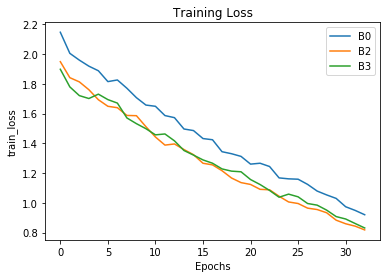

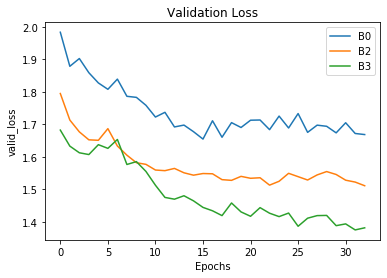

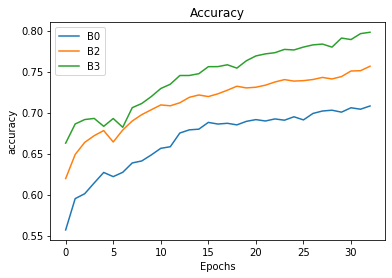

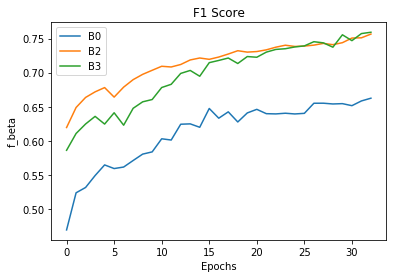

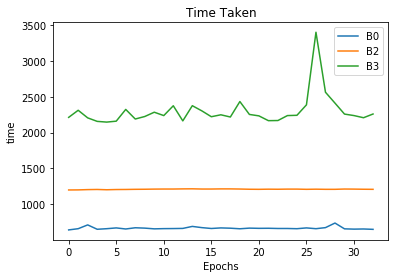

In [29]:
# Make ALL the graphs
for i in range(cols_to_use):
    column = b0.columns[i]
    plt.plot(np.arange(x), b0[column][:x], label="B0")
    plt.plot(np.arange(x), b2[column][:x], label="B2")
    plt.plot(np.arange(x), b3[column][:x], label="B3")
    plt.ylabel(column)
    plt.xlabel("Epochs")
    plt.legend()
    plt.title(nice_column_names[i])
    plt.show()

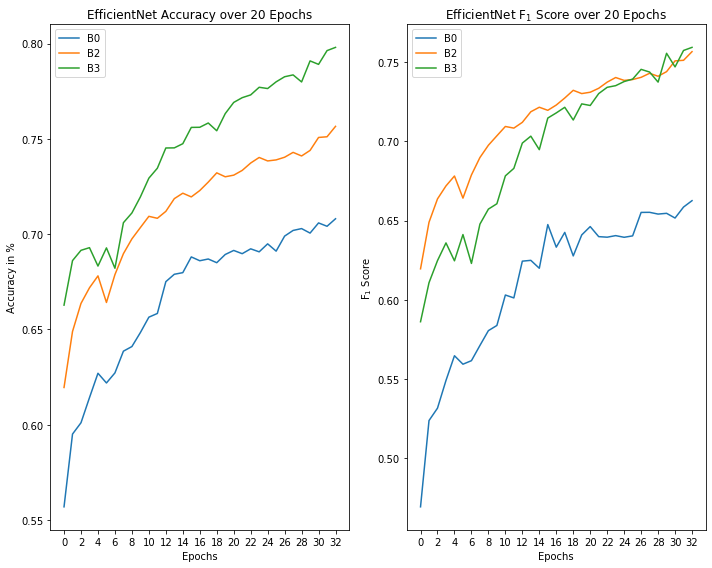

In [38]:
# Honing in on Graphs we want
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
column = "accuracy"
x_len=33
plt.plot(np.arange(x_len), b0[column][:x_len], label="B0")
plt.plot(np.arange(x_len), b2[column][:x_len], label="B2")
plt.plot(np.arange(x_len), b3[column][:x_len], label="B3")
plt.ylabel("Accuracy in %")
plt.xlabel("Epochs")
plt.legend()
plt.xticks(np.arange(0,x_len+1,2))
plt.title("EfficientNet Accuracy over 20 Epochs")
plt.subplot(1,2,2)
column = "f_beta"
x_len=33
plt.plot(np.arange(x_len), b0[column][:x_len], label="B0")
plt.plot(np.arange(x_len), b2[column][:x_len], label="B2")
plt.plot(np.arange(x_len), b3[column][:x_len], label="B3")
plt.ylabel("F$_1$ Score")
plt.xlabel("Epochs")
plt.legend()
plt.title("EfficientNet F$_1$ Score over 20 Epochs")
plt.xticks(np.arange(0,x_len+1,2))
plt.tight_layout()
plt.savefig("acc_and_f1.png")
plt.show()

In [34]:
# Other useful information
b0_avg_time = b0.time.mean()
b2_avg_time = b2.time.mean()
b3_avg_time = b3.time.mean()
print(b0_avg_time/60, b2_avg_time/60, b3_avg_time/60)

11.05625 20.13625 38.311274509803916


In [40]:
# Precision Recall Curves
precision = b2['precision']
recall    = b2['recall']

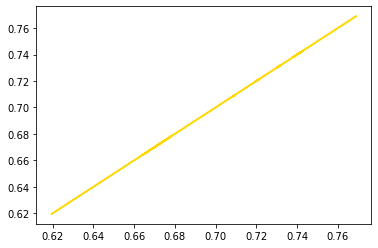

In [41]:
plt.plot(recall, precision, color='gold', lw=2)

In [ ]:
# Confusion Matrix
learn = 
interp = ClassificationInterpretation.from_learner(learn)